# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag (This is your target variable!)
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## Libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from category_encoders.cat_boost import CatBoostEncoder

from sklearn.metrics import classification_report
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout



Using TensorFlow backend.


In [2]:
data = pd.read_csv('ChurnPrediction/churn-prediction.csv')

## 1. Data preprocessing, normalization, missing data, categorical data

In [3]:
def one_hot_encode(df, column, prefix):# found this function which is b
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_data(df, scale=False, one_hot=False , age_groupe = False ):
    
    #drop ID - has only unique values
    df = df.drop('CLIENTNUM', axis=1)
    
    # if True create  Age_groupe
    if age_groupe == True:
        list_AgeGroup = [df]
        for column in list_AgeGroup:
            df.loc[column["Customer_Age"] < 18,  'age_group'] = 18
            df.loc[(column["Customer_Age"] >= 19) & (column["Customer_Age"] <= 29), 'age_group'] = 20
            df.loc[(column["Customer_Age"] >= 30) & (column["Customer_Age"] <= 39), 'age_group'] = 30
            df.loc[(column["Customer_Age"] >= 40) & (column["Customer_Age"] <= 49), 'age_group'] = 40
            df.loc[(column["Customer_Age"] >= 50) & (column["Customer_Age"] <= 59), 'age_group'] = 50
            df.loc[column["Customer_Age"] >= 60, 'age_group'] = 60
        
    
    # handle unknown values
    df['Income_Category'] = df['Income_Category'].replace('Unknown', np.NaN)
   
    
    # Fill ordinal missing values with modes ( Income_Category column)
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
    
    # handle unknown values of marital status
    df['Marital_Status'] = df['Marital_Status'].replace('Unknown', np.NaN)
    
    # Fill missing values with dominant value ( Marital_Status column)
    df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].value_counts().index[0])

    #Ordinal Variables Encoding

    Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 2,
    '$80K - $120K'   : 3,
    '$120K +'        : 4
    
    }
    Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
    }


    Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
    }

    # Too many Unknown value to exclude it
    Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 3,
    'Post-Graduate' : 4,
    'Doctorate'     : 5,
    'Unknown'       : 6
    }
    
    Gender_Map = {
        'M' : 0,
        'F' : 1
    }


    
    #encoding using the function above creating + deleting old columns
    if one_hot == True:
        
        df = one_hot_encode(df, 'Marital_Status', prefix='MS')
        df = one_hot_encode(df, 'Card_Category', prefix='CC')
        df = one_hot_encode(df, 'Gender', prefix='Gender')
        df = one_hot_encode(df, 'Education_Level', prefix='Education_Level')
        df = one_hot_encode(df, 'Income_Category', prefix='Income_Category')
        if age_groupe == True :
            df = one_hot_encode(df, 'age_group', prefix='Age_Group')
    else:
        df.loc[:, 'Card_Category'] = df['Card_Category'].map(Card_Category_map)
        df.loc[:, 'Income_Category'] = df['Income_Category'].map(Income_Category_map)
        df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)
        df.loc[:, 'Education_Level'] = df['Education_Level'].map(Education_Level_map)
        df.loc[:, 'Gender'] = df['Gender'].map(Gender_Map)
    # Label Encoder
    le = LabelEncoder()
    
    # the remaining categorical data are 'objects' as datatyes
    categ = [x for x in df.columns if df[x].dtype == 'object']
    
    #fit_transform on each categorical column
    for a in categ:
        df.loc[:, a]=le.fit_transform(df.loc[:,a])
        
   
    #X["Total_Trans_Ct_Categorical"] = pd.cut(X.Total_Trans_Ct,bins = 16, labels = range(1,17)) 
    #X["Total_Trans_Amt_Categorical"] =pd.cut(X.Total_Trans_Amt,bins = 16, labels = range(1,17))

    
    
    
    y = df.Attrition_Flag 
    X = df.drop('Attrition_Flag', axis=1)
    
   
    
    
    #Scale X
    if scale == True:
        scaler = StandardScaler()
        ro_sc = RobustScaler()

        X_ =X.loc[:,['Customer_Age', 
                     'Dependent_count',
                     'Months_on_book', 
                     'Total_Relationship_Count',
                     'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon',
                     'Credit_Limit',
                     'Total_Revolving_Bal',
                     'Avg_Open_To_Buy',
                     'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt',
                     'Total_Trans_Ct', 
                     'Total_Ct_Chng_Q4_Q1',
                     'Avg_Utilization_Ratio']]
        
        X = X.drop(['Customer_Age',
                    'Dependent_count',
                    'Months_on_book',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon',
                    'Credit_Limit',
                    'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 
                    'Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt',
                    'Total_Trans_Ct', 
                    'Total_Ct_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio'], axis= 1)
    
        X_ = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
        
        X = X.merge(X_, left_index = True, right_index = True)
        
        
        X_2 = X.loc[:,['Credit_Limit', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt' ]]
        X = X.drop(['Credit_Limit',  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt'], axis = 1)
        
        X_2 = pd.DataFrame(ro_sc.fit_transform(X_2), columns= X_2.columns)
        X = X.merge(X_2, left_index = True, right_index = True)
       
    
        #create bins for bimodal continious data
        X["Total_Trans_Ct_Categorical"] = pd.cut(X.Total_Trans_Ct,bins = 16, labels = range(1,17)) 
        X["Total_Trans_Amt_Categorical"] =pd.cut(X.Total_Trans_Amt,bins = 16, labels = range(1,17))

    
    return X, y


    

## Preprocessing with CatBoost Encoder

In [6]:
def cat_boost(df):
    
    
    # handle unknown values
    df['Income_Category'] = df['Income_Category'].replace('Unknown', np.NaN)
   
    
    # Fill ordinal missing values with modes ( Income_Category column)
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
    
    # handle unknown values of marital status
    df['Marital_Status'] = df['Marital_Status'].replace('Unknown', np.NaN)
    
    # Fill missing values with dominant value ( Marital_Status column)
    df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].value_counts().index[0])
    
    # drop ID - has only unique values
    df = df.drop('CLIENTNUM', axis=1)
    
    Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
    }
    
    df.loc[:, 'Attrition_Flag'] = df['Attrition_Flag'].map(Attrition_Flag_map)   
        
    y = df.Attrition_Flag 
    X = df.drop('Attrition_Flag', axis=1)
    
    columns = list(X.columns)
   
    # the remaining categorical data are 'objects' as datatyes
    categ = [x for x in df.columns if df[x].dtype == 'object']
    categ.append('Dependent_count')
    categ.append('Months_on_book')
    categ.append('Total_Relationship_Count')
    categ.append('Credit_Limit')

    numerical = list(set(columns) - set(categ))
    # Define catboost encoder
    cbe_encoder = CatBoostEncoder()  
    
    df_cat = X.loc[:, categ]
    df_num = X.loc[:, numerical]
    X = X.drop(numerical, axis = 1)

    # Fit encoder and transform the features
    cbe_encoder.fit(X, y)
    X = cbe_encoder.transform(X)
    
    X = X.merge(df_num, left_index = True, right_index = True)

    
    return X, y

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

### Neural Network 

In [15]:
model = keras.Sequential([
    Dense(52, activation='relu', input_dim=21),
    Dropout(0.5),
    
    Dense(52, activation='relu'),    
    Dropout(0.5),
    
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()



####


X, y = preprocess_data(data, scale=True, one_hot=False) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train, batch_size=32, epochs=50,verbose=0)

from sklearn.metrics import classification_report


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 52)                1144      
_________________________________________________________________
dropout_15 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 52)                2756      
_________________________________________________________________
dropout_16 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 53        
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________


In [16]:
prediction_nn = model.predict(X_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3390
           1       0.89      0.72      0.80       661

    accuracy                           0.94      4051
   macro avg       0.92      0.85      0.88      4051
weighted avg       0.94      0.94      0.94      4051



 

Creating a Neural Network didn't disappoint as result , however  :

- having a dataset of only 10k entry is far from enough.
- small set of features
- NN works better with homogenous data
- unlike data from images, audio and language, there can be little variation in a column of a table
- tabular data have more categorical features which

 ## Classical ML models

In [5]:
models = []


#col names for metric table

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
print(model_results)

Empty DataFrame
Columns: [Algorithm, ROC AUC Mean, ROC AUC STD, Accuracy Mean, Accuracy STD]
Index: []


### Random Forrest Classifier

In [6]:
#Process data for Tree Based Alg.
X, y = preprocess_data(data, scale=False, one_hot=False )

rand_for_clf = RandomForestClassifier(max_depth=8, random_state=1)
rand_for_clf.fit(X, y)

name='Random Forrest Classifier'

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores_acc = cross_val_score(rand_for_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(rand_for_clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[0] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]




print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))
display(model_results)

Accuracy: 0.946 (0.007)
                   Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0  Random Forrest Classifier         98.35         0.31          94.61   

   Accuracy STD  
0          0.68  



### Logistic Regression Classifier

In [7]:
# We reprocess data in favour for the classification algorithm
X, y = preprocess_data(data , scale =True, one_hot= True)

LogReg_clf = LogisticRegression(random_state = 1)
name = 'Logistic Regression Classifier'


n_scores_acc = cross_val_score(LogReg_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(LogReg_clf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[1] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))

display(model_results)

Accuracy: 0.905 (0.008)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82


### AdaBoost Classifier

In [8]:
# We reprocess data in favour for the classification algorithm
X, y = preprocess_data(data , scale =True, one_hot= True)

ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
name = 'Ada Boost'


n_scores_acc = cross_val_score(ada_boost, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(ada_boost, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[2] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))

display(model_results)

Accuracy: 0.961 (0.005)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82
2,Ada Boost,98.75,0.32,96.14,0.47


### GradientBoosting Classifier

In [31]:
X, y = preprocess_data(data, scale=False, one_hot=False)

gb = GradientBoostingClassifier(n_estimators=150, learning_rate = 0.1, max_features=None, max_depth = 2, random_state = 0)
name = 'GradientBoosting Classifier'

n_scores_acc = cross_val_score(gb, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(gb, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[3] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))

display(model_results)
model_results.to_csv('model_results.csv')

Accuracy: 0.963 (0.005)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Ada Boost,98.75,0.32,96.14,0.47
3,GradientBoosting Classifier,98.83,0.23,96.28,0.48
6,Cat Boost,98.38,0.31,95.64,0.56
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82
4,SVM Classifier,92.02,1.02,90.65,0.75
5,K Neighbors Classifier,88.17,1.57,89.13,0.70


### SVM Classifier

In [12]:

X, y = preprocess_data(data, scale=True, one_hot=True)


svc = SVC(kernel = 'linear', random_state = 0)
name = 'SVM Classifier'

n_scores_acc = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(svc, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[4] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))

display(model_results)

Accuracy: 0.907 (0.007)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82
2,Ada Boost,98.75,0.32,96.14,0.47
3,GradientBoosting Classifier,98.75,0.27,96.04,0.53
4,SVM Classifier,92.02,1.02,90.65,0.75


In [13]:
model_results.to_csv('model_results.csv')

### KNeighbors  Classifier

In [14]:
X, y = preprocess_data(data, scale=False, one_hot=False)

k_neig = KNeighborsClassifier(n_neighbors = 5, metric ="minkowski", p = 2)
name = 'K Neighbors Classifier'

n_scores_acc = cross_val_score(k_neig, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(k_neig, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[5] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))

display(model_results)

Accuracy: 0.891 (0.007)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82
2,Ada Boost,98.75,0.32,96.14,0.47
3,GradientBoosting Classifier,98.75,0.27,96.04,0.53
4,SVM Classifier,92.02,1.02,90.65,0.75
5,K Neighbors Classifier,88.17,1.57,89.13,0.70


### CatBoost Classifier


In [15]:
model_results.to_csv('model_results.csv')

In [16]:
from catboost import CatBoostClassifier

X, y = cat_boost(data)

cat = CatBoostClassifier(n_estimators=150, learning_rate = 0.1, max_depth = 2, random_state = 0)
name= 'Cat Boost'

n_scores_acc = cross_val_score(cat , X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores_auc = cross_val_score(cat, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')


model_results.loc[6] = [name, 
                         round(n_scores_auc.mean()*100, 2),
                         round(n_scores_auc.std()*100, 2),
                         round(n_scores_acc.mean()*100, 2),
                         round(n_scores_acc.std()*100, 2)]
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_acc), std(n_scores_acc)))

display(model_results)

Accuracy: 0.956 (0.006)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82
2,Ada Boost,98.75,0.32,96.14,0.47
3,GradientBoosting Classifier,98.75,0.27,96.04,0.53
4,SVM Classifier,92.02,1.02,90.65,0.75
5,K Neighbors Classifier,88.17,1.57,89.13,0.70
6,Cat Boost,98.38,0.31,95.64,0.56


In [17]:
model_results.to_csv('model_results.csv')

In [22]:
X, y= cat_boost(data)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.4, random_state=1234)
categorical_features_indices = np.where(X.dtypes != np.float)[0]

cat.fit(X_train, y_train ,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6431775	test: 0.6393640	best: 0.6393640 (0)	total: 56.1ms	remaining: 8.35s
1:	learn: 0.5956027	test: 0.5913979	best: 0.5913979 (1)	total: 58.2ms	remaining: 4.31s
2:	learn: 0.5574279	test: 0.5529048	best: 0.5529048 (2)	total: 60.1ms	remaining: 2.95s
3:	learn: 0.5253403	test: 0.5194269	best: 0.5194269 (3)	total: 61.9ms	remaining: 2.26s
4:	learn: 0.4968813	test: 0.4904155	best: 0.4904155 (4)	total: 63.7ms	remaining: 1.85s
5:	learn: 0.4734470	test: 0.4662958	best: 0.4662958 (5)	total: 65.2ms	remaining: 1.56s
6:	learn: 0.4520152	test: 0.4435801	best: 0.4435801 (6)	total: 66.8ms	remaining: 1.36s
7:	learn: 0.4344743	test: 0.4260302	best: 0.4260302 (7)	total: 68.2ms	remaining: 1.21s
8:	learn: 0.4180054	test: 0.4086815	best: 0.4086815 (8)	total: 69.7ms	remaining: 1.09s
9:	learn: 0.4048369	test: 0.3953950	best: 0.3953950 (9)	total: 71.1ms	remaining: 995ms
10:	learn: 0.3946257	test: 0.3853010	best: 0.3853010 (10)	total: 72.7ms	remaining: 918ms
11:	learn: 0.3821298	test: 0.3726972	best

## 4. Evaluation and comparisons, various metrics

In [35]:
#model_results = model_results.sort_values(by = [''], ascending = False)
display(model_results)
model_results.to_csv('model_results.csv')


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
3,GradientBoosting Classifier,98.83,0.23,96.28,0.48
2,Ada Boost,98.75,0.32,96.14,0.47
6,Cat Boost,98.38,0.31,95.64,0.56
0,Random Forrest Classifier,98.35,0.31,94.61,0.68
1,Logistic Regression Classifier,92.41,0.96,90.55,0.82
4,SVM Classifier,92.02,1.02,90.65,0.75
5,K Neighbors Classifier,88.17,1.57,89.13,0.70


No handles with labels found to put in legend.


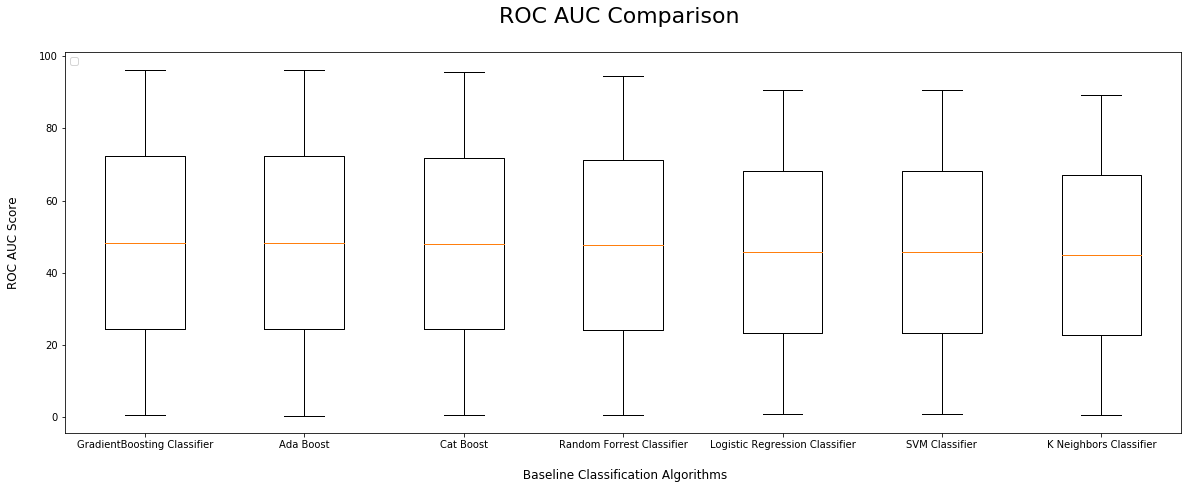

In [36]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
plt.boxplot(model_results[["Accuracy Mean", "Accuracy STD"]])
ax.set_xticklabels(model_results.Algorithm)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")

plt.legend(loc='upper left', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

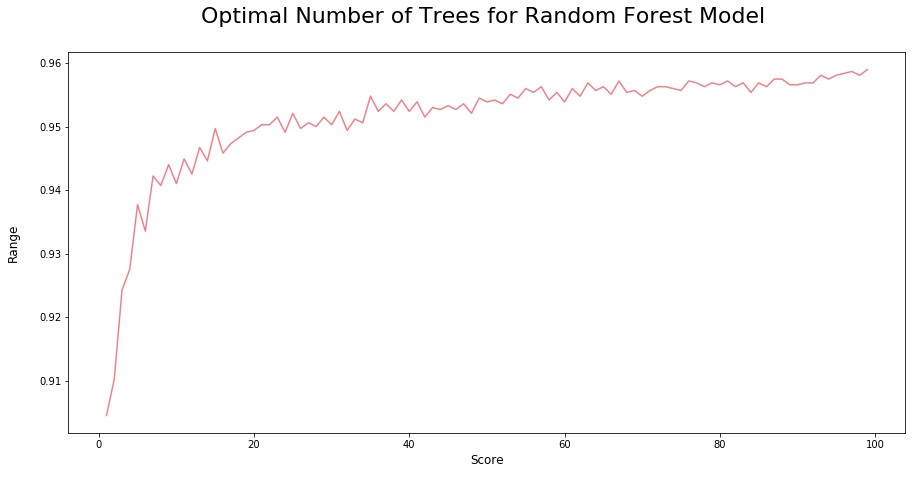

In [28]:
from sklearn import metrics

X, y= preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## 5. Hyperparameter Optimization

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import GridSearchCV



#parameters = {'n_estimators' : [150,200,250,300],
#            'min_samples_split' : [0.2, 0.4, 0.6, 0.8, 1.0, 2], 
#           'learning_rate' : [0.01, 0.1, 1], 
#           'max_features':[None, 'log2', 'sqrt'], 
#            'max_depth' : [1,2,3,4,5,7],

#                 'random_state':[0]}



#X, y = preprocess_data(data, scale=False, one_hot=False)
#gb = GradientBoostingClassifier()
#clf = GridSearchCV(estimator=gb, param_grid=parameters,scoring='accuracy',cv=cv, verbose = 2)
#clf.fit(X,y)
#sorted(clf.cv_results_.keys())
#print(clf.best_score_)
#print(clf.best_params_)






#import pickle
#pickle.dump(clf, open('grid_search.sav', 'wb'))

grid_search_clf = pickle.load(open('grid_search.sav', 'rb'))
grid_search_clf

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect